In [9]:
from py2neo import Graph
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

graph = Graph("bolt://localhost:7687", auth=("neo4j", "password"))

### LogReg

In [32]:
query_lr = """
                MATCH (m1:Movie)-[r:RECOMMENDS_LR]->(m2:Movie)
                WHERE m1.title = 'The Matrix'
                RETURN id(m1) AS source, m1.title AS source_title,
                       id(m2) AS target, m2.title AS target_title,
                       r
                LIMIT 10
"""

In [33]:
df_lr = graph.run(query_lr).to_data_frame()

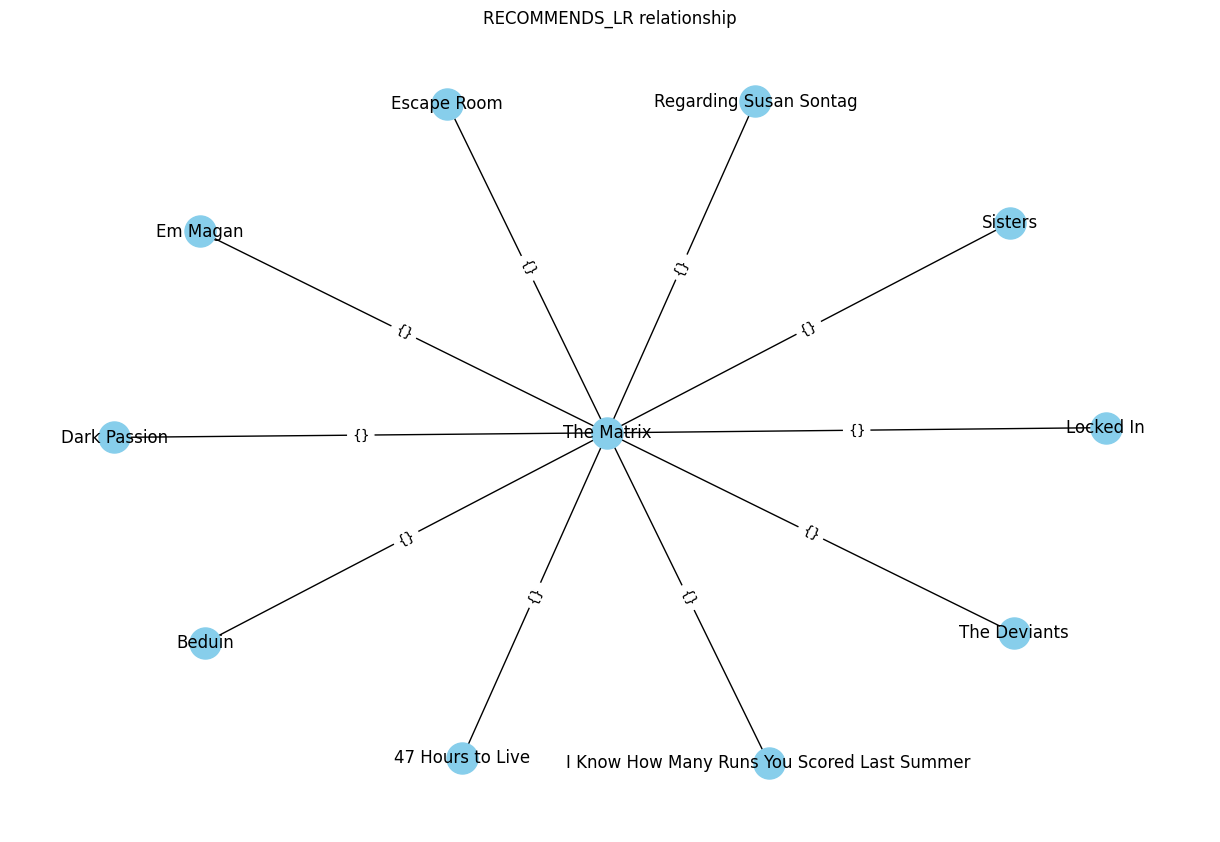

In [34]:
G = nx.Graph()

for _, row in df_lr.iterrows():
    G.add_node(row['source'], label=row['source_title'])
    G.add_node(row['target'], label=row['target_title'])
    G.add_edge(row['source'], row['target'])  # 🔴 This was missing

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue')
nx.draw_networkx_labels(G, pos, {n: G.nodes[n]['label'] for n in G.nodes})
nx.draw_networkx_edge_labels(G, pos)

plt.title("RECOMMENDS_LR relationship")
plt.axis('off')
plt.show()

### random forest

In [35]:
query_rf = """
                MATCH (m1:Movie)-[r:RECOMMENDS]->(m2:Movie)
                WHERE m1.title = 'The Matrix'
                RETURN id(m1) AS source, m1.title AS source_title,
                       id(m2) AS target, m2.title AS target_title,
                       r
                LIMIT 10
"""

In [36]:
df_rf = graph.run(query_rf).to_data_frame()

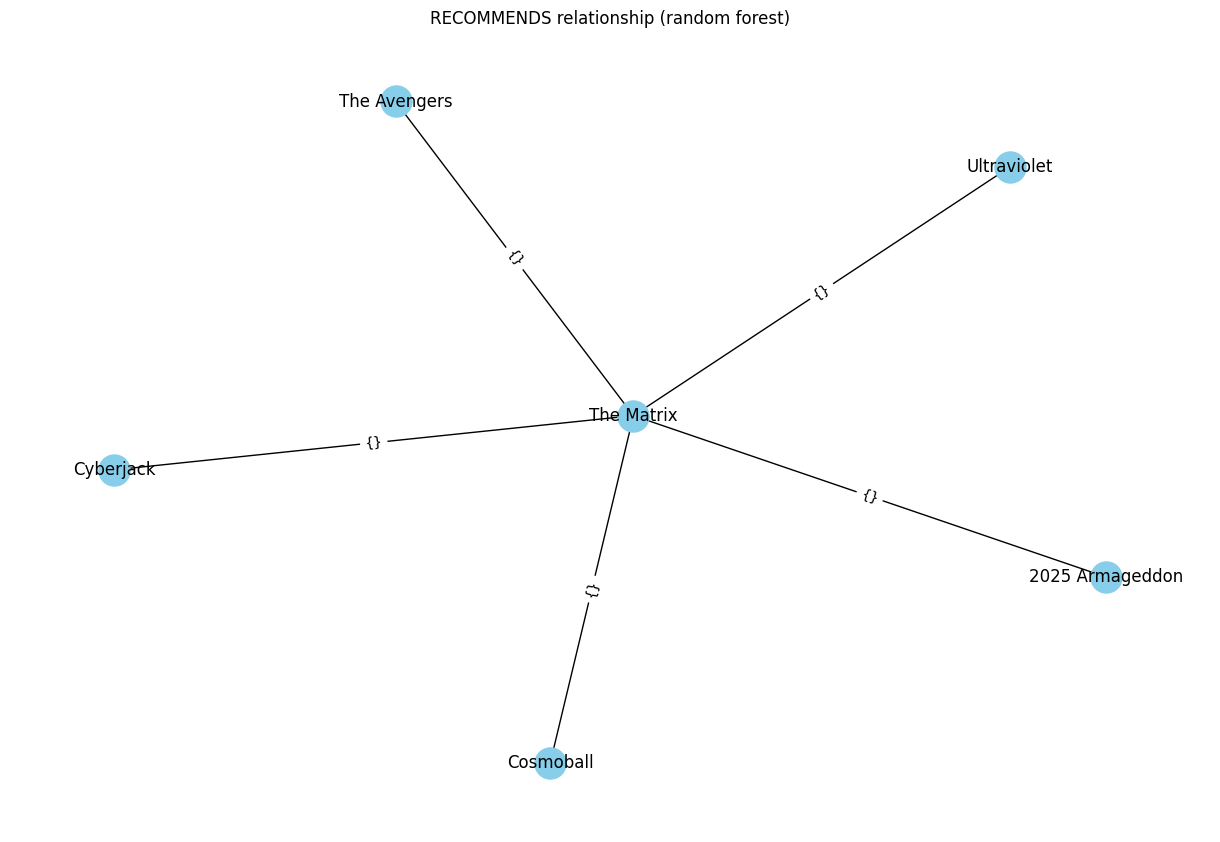

In [37]:
G = nx.Graph()

for _, row in df_rf.iterrows():
    G.add_node(row['source'], label=row['source_title'])
    G.add_node(row['target'], label=row['target_title'])
    G.add_edge(row['source'], row['target'])  # 🔴 This was missing

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue')
nx.draw_networkx_labels(G, pos, {n: G.nodes[n]['label'] for n in G.nodes})
nx.draw_networkx_edge_labels(G, pos)

plt.title("RECOMMENDS relationship (random forest)")
plt.axis('off')
plt.show()
